# Использование методов оптимизации
## Задача 1. Минимизация гладкой функции

Рассмотрим все ту же функцию из задания по линейной алгебре: f(x) = sin(x / 5) * exp(x / 10) + 5 * exp(-x / 2), но теперь уже на промежутке [1, 30]

В первом задании будем искать минимум этой функции на заданном промежутке с помощью scipy.optimize. Разумеется, в дальнейшем вы будете использовать методы оптимизации для более сложных функций, а f(x) мы рассмотрим как удобный учебный пример.

Напишите на Питоне функцию, вычисляющую значение f(x) по известному x. Будьте внимательны: не забывайте про то, что по умолчанию в питоне целые числа делятся нацело, и о том, что функции sin и exp нужно импортировать из модуля math.

In [3]:
import numpy as np
def f(x):
    return np.sin(x / 5) * np.exp(x / 10) + 5 * np.exp(-x / 2)

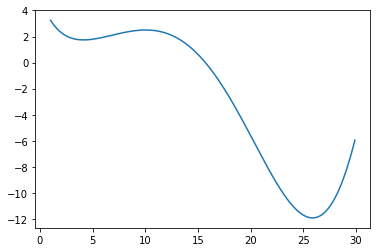

In [4]:
from matplotlib import pyplot as plt
x = np.arange(1, 30, 0.1)
y = f(x)
plt.plot(x, y)
plt.show()

Изучите примеры использования scipy.optimize.minimize в документации Scipy (см. "Материалы") Справка по функциям пакета scipy.optimize: http://docs.scipy.org/doc/scipy/reference/optimize.html

In [5]:
from scipy.optimize import minimize

Попробуйте найти минимум, используя стандартные параметры в функции scipy.optimize.minimize (т.е. задав только функцию и начальное приближение). Попробуйте менять начальное приближение и изучить, меняется ли результат. 

In [6]:
for i in range(1, 31):
    print(round(minimize(f, i).x[0], 2), end=' ')

4.14 4.14 4.14 4.14 4.14 4.14 4.14 4.14 4.14 4.14 25.88 25.88 88.71 25.88 24.68 25.88 25.88 25.88 25.88 25.88 25.88 25.88 25.88 25.88 25.88 25.88 25.88 25.88 25.88 25.88 

Укажите в scipy.optimize.minimize в качестве метода BFGS (один из самых точных в большинстве случаев градиентных методов оптимизации), запустите из начального приближения x=2. Градиент функции при этом указывать не нужно – он будет оценен численно. Полученное значение функции в точке минимума - ваш первый ответ по заданию 1, его надо записать с точностью до 2 знака после запятой.

In [7]:
print(minimize(f, 2, method='BFGS'))
file = open("1.txt", 'w')
file.write(str(round(minimize(f, 2, method='BFGS').fun, 2)))
file.close()
!cat 1.txt

      fun: 1.7452682903449388
 hess_inv: array([[ 5.98752437]])
      jac: array([ -2.07126141e-06])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 6
     njev: 7
   status: 0
  success: True
        x: array([ 4.13627618])
1.75

Теперь измените начальное приближение на x=30. Значение функции в точке минимума - ваш второй ответ по заданию 1, его надо записать через пробел после первого, с точностью до 2 знака после запятой.

In [8]:
print(minimize(f, 30, method='BFGS'))
file = open("1.txt", 'a')
file.write(" " + str(round(minimize(f, 30, method='BFGS').fun, 2)))
file.close()
! cat 1.txt

      fun: -11.898894665981285
 hess_inv: array([[ 1.67932484]])
      jac: array([  2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 6
     njev: 7
   status: 0
  success: True
        x: array([ 25.88019339])
1.75 -11.9

Стоит обдумать полученный результат. Почему ответ отличается в зависимости от начального приближения? Если нарисовать график функции (например, как это делалось в видео, где мы знакомились с Numpy, Scipy и Matplotlib), можно увидеть, в какие именно минимумы мы попали. В самом деле, градиентные методы обычно не решают задачу глобальной оптимизации, поэтому результаты работы ожидаемые и вполне корректные.

## Задача 2. Глобальная оптимизация

Теперь попробуем применить к той же функции f(x) метод глобальной оптимизации — дифференциальную эволюцию.
Изучите документацию и примеры использования функции scipy.optimize.differential_evolution.

In [9]:
from scipy.optimize import differential_evolution

Запустите поиск минимума функции f(x) с помощью дифференциальной эволюции на промежутке [1, 30]. Полученное значение функции в точке минимума - ответ в задаче 2. Запишите его с точностью до второго знака после запятой. В этой задаче ответ - только одно число.

In [10]:
print(differential_evolution(f, bounds=[(1, 30)]))
file = open("2.txt", 'w')
file.write(str(round(differential_evolution(f, bounds=[(1, 30)]).fun[0], 2)))
file.close()
!cat 2.txt

     fun: array([-11.89889467])
     jac: array([  5.50670620e-06])
 message: 'Optimization terminated successfully.'
    nfev: 66
     nit: 3
 success: True
       x: array([ 25.8802025])
-11.9

Заметьте, дифференциальная эволюция справилась с задачей поиска глобального минимума на отрезке, т.к. по своему устройству она предполагает борьбу с попаданием в локальные минимумы.

Сравните количество итераций, потребовавшихся BFGS для нахождения минимума при хорошем начальном приближении, с количеством итераций, потребовавшихся дифференциальной эволюции. При повторных запусках дифференциальной эволюции количество итераций будет меняться, но в этом примере, скорее всего, оно всегда будет сравнимым с количеством итераций BFGS. Однако в дифференциальной эволюции за одну итерацию требуется выполнить гораздо больше действий, чем в BFGS. Например, можно обратить внимание на количество вычислений значения функции (nfev) и увидеть, что у BFGS оно значительно меньше. Кроме того, время работы дифференциальной эволюции очень быстро растет с увеличением числа аргументов функции.

## Задача 3. Минимизация негладкой функции

Теперь рассмотрим функцию h(x) = int(f(x)) на том же отрезке [1, 30], т.е. теперь каждое значение f(x) приводится к типу int и функция принимает только целые значения.

In [11]:
def h(x):
    return int(f(x))

Такая функция будет негладкой и даже разрывной, а ее график будет иметь ступенчатый вид. Убедитесь в этом, построив график h(x) с помощью matplotlib.

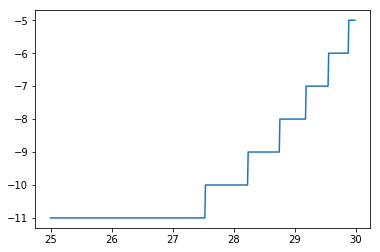

In [12]:
from matplotlib import pyplot as plt
x = np.arange(25, 30, 0.01)
y = np.array([h(t) for t in x])
plt.plot(x, y)
plt.show()

Попробуйте найти минимум функции h(x) с помощью BFGS, взяв в качестве начального приближения x=30. Получившееся значение функции – ваш первый ответ в этой задаче.

In [13]:
print(minimize(h, 30, method='BFGS'))
file = open("3.txt", 'w')
file.write(str(minimize(h, 30, method='BFGS').fun))
file.close()
!cat 3.txt

      fun: -5
 hess_inv: array([[1]])
      jac: array([ 0.])
  message: 'Optimization terminated successfully.'
     nfev: 3
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([ 30.])
-5

Теперь попробуйте найти минимум h(x) на отрезке [1, 30] с помощью дифференциальной эволюции. Значение функции h(x) в точке минимума – это ваш второй ответ в этом задании. Запишите его через пробел после предыдущего.

In [14]:
print(differential_evolution(h, [(1, 30)]))
file = open('3.txt', 'a')
file.write(' ' + str(int(differential_evolution(h, [(1, 30)]).fun)))
file.close()
!cat 3.txt

     fun: -11.0
 message: 'Optimization terminated successfully.'
    nfev: 77
     nit: 4
 success: True
       x: array([ 25.9450997])
-5 -11

Обратите внимание на то, что полученные ответы различаются. Это ожидаемый результат, ведь BFGS использует градиент (в одномерном случае – производную) и явно не пригоден для минимизации рассмотренной нами разрывной функции. Попробуйте понять, почему минимум, найденный BFGS, именно такой (возможно в этом вам поможет выбор разных начальных приближений).

In [15]:
for i in range(1, 31):
    print(minimize(h, i).x, end = ' ')

[ 1.] [ 2.] [ 3.] [ 4.] [ 5.] [ 6.] [ 7.] [ 8.] [ 9.] [ 10.] [ 11.] [ 12.] [ 13.] [ 14.] [ 15.] [ 16.] [ 17.] [ 18.] [ 19.] [ 20.] [ 21.] [ 22.] [ 23.] [ 24.] [ 25.] [ 26.] [ 27.] [ 28.] [ 29.] [ 30.] 


Выполнив это задание, вы увидели на практике, чем поиск минимума функции отличается от глобальной оптимизации, и когда может быть полезно применить вместо градиентного метода оптимизации метод, не использующий градиент. Кроме того, вы попрактиковались в использовании библиотеки SciPy для решения оптимизационных задач, и теперь знаете, насколько это просто и удобно.